Length of Date: 31
Length of Min_Temperature: 31
Length of Frost: 31


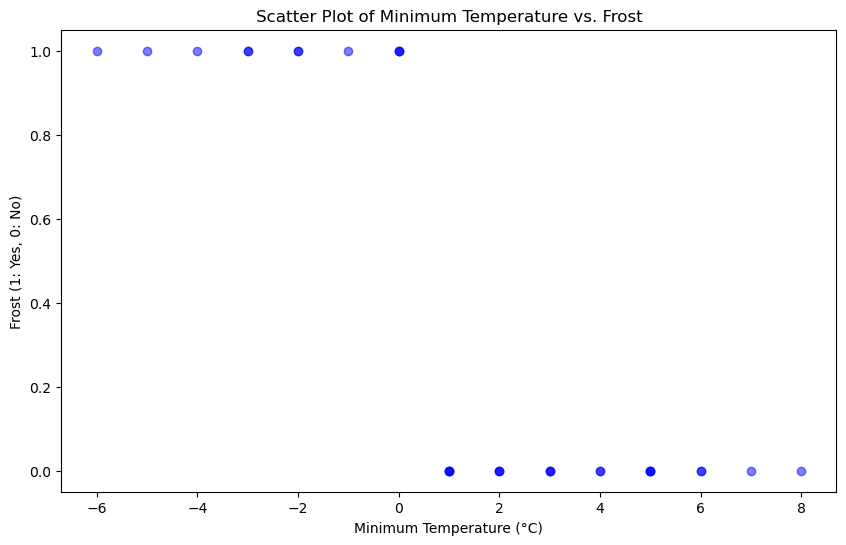

T-statistic: -7.666492034097366
P-value: 1.8762908008234207e-08


<Figure size 1000x600 with 0 Axes>

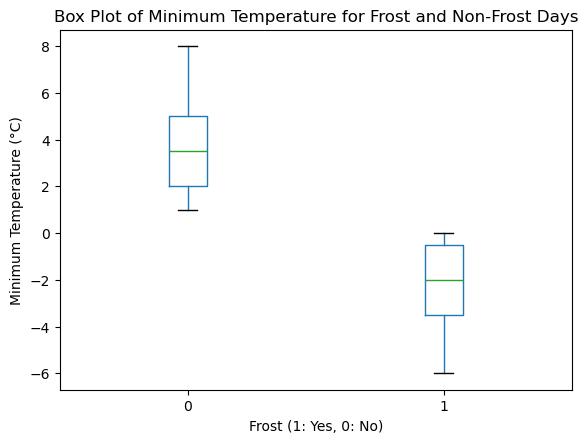

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Sample data (replace this with your actual dataset)
data = {
    'Date': pd.date_range(start='2023-01-01', end='2023-01-31'),
    'Min_Temperature': [-2, 1, 3, -5, 2, 6, 0, 4, -3, 1, 8, 5, -1, 3, 2, 7, 0, -4, 1, 5, -2, 6, 4, 1, 3, -6, 2, 5, 0, -3, 5],
    'Frost': [1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0]
}

# Print lengths of arrays
print(f'Length of Date: {len(data["Date"])}')
print(f'Length of Min_Temperature: {len(data["Min_Temperature"])}')
print(f'Length of Frost: {len(data["Frost"])}')

# Ensure all arrays have the same length
# assert len(data['Date']) == len(data['Min_Temperature']) == len(data['Frost'])

df = pd.DataFrame(data)

# Data Preprocessing
# Assuming temperature is in Celsius, convert it to Fahrenheit if necessary
# ...

# Exploratory Data Analysis (EDA)
plt.figure(figsize=(10, 6))
plt.scatter(df['Min_Temperature'], df['Frost'], color='blue', alpha=0.5)
plt.title('Scatter Plot of Minimum Temperature vs. Frost')
plt.xlabel('Minimum Temperature (°C)')
plt.ylabel('Frost (1: Yes, 0: No)')
plt.show()

# Statistical Analysis
frosty_temps = df[df['Frost'] == 1]['Min_Temperature']
non_frosty_temps = df[df['Frost'] == 0]['Min_Temperature']

t_stat, p_value = ttest_ind(frosty_temps, non_frosty_temps)

print(f'T-statistic: {t_stat}\nP-value: {p_value}')

# Visualization
plt.figure(figsize=(10, 6))
df.boxplot(column='Min_Temperature', by='Frost', grid=False)
plt.title('Box Plot of Minimum Temperature for Frost and Non-Frost Days')
plt.suptitle('')
plt.xlabel('Frost (1: Yes, 0: No)')
plt.ylabel('Minimum Temperature (°C)')
plt.show()


In [16]:
data

{'Date': DatetimeIndex(['2023-01-01 00:00:00', '2023-01-01 01:00:00',
                '2023-01-01 02:00:00', '2023-01-01 03:00:00',
                '2023-01-01 04:00:00', '2023-01-01 05:00:00',
                '2023-01-01 06:00:00', '2023-01-01 07:00:00',
                '2023-01-01 08:00:00', '2023-01-01 09:00:00',
                '2023-01-01 10:00:00', '2023-01-01 11:00:00',
                '2023-01-01 12:00:00', '2023-01-01 13:00:00',
                '2023-01-01 14:00:00', '2023-01-01 15:00:00',
                '2023-01-01 16:00:00', '2023-01-01 17:00:00',
                '2023-01-01 18:00:00', '2023-01-01 19:00:00',
                '2023-01-01 20:00:00', '2023-01-01 21:00:00',
                '2023-01-01 22:00:00', '2023-01-01 23:00:00',
                '2023-01-02 00:00:00'],
               dtype='datetime64[ns]', freq='H'),
 'Min_Temperature': array([ 3, -4,  3, -2, -1,  0,  2,  0, -5, -1, -5, -5,  2, -3,  0, -5,  1,
        -2, -3, -2,  3, -2,  2])}

In [36]:
import pandas as pd

# Assuming you have a DataFrame df with a 'Date' column and 'Min_Temperature' column
# Replace this with your actual data
import numpy as np

# Define the range for random integers
low_limit = -5
high_limit = 5

# Generate an array of 10 random integers in the specified range
random_integers = np.random.randint(low=low_limit, high=high_limit + 1, size=25)

# Sample data (replace this with your actual dataset)
data = {
    'Date': pd.date_range(start='2023-01-01 00:00:00', end='2023-01-02 00:00:00', freq='H'),
    'Min_Temperature': random_integers,
}

df = pd.DataFrame(data)

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Find consecutive periods where temperature is below zero
below_zero_periods = (df['Min_Temperature'] < 0).astype(int).groupby((df['Min_Temperature'] >= 0).astype(int).cumsum()).cumsum()

# Count events where temperature is below zero for at least 10 consecutive minutes within a two-hour period
events_count = (below_zero_periods==2).sum()

print(f'Number of events with temperature below zero for at least 10 minutes in a two-hour period: {events_count}')


Number of events with temperature below zero for at least 10 minutes in a two-hour period: 2


In [37]:
df

Min_Temperature
Date                                
2023-01-01 00:00:00               -4
2023-01-01 01:00:00               -2
2023-01-01 02:00:00                4
2023-01-01 03:00:00                5
2023-01-01 04:00:00                5
2023-01-01 05:00:00                0
2023-01-01 06:00:00               -2
2023-01-01 07:00:00                1
2023-01-01 08:00:00                2
2023-01-01 09:00:00               -5
2023-01-01 10:00:00                1
2023-01-01 11:00:00               -2
2023-01-01 12:00:00                5
2023-01-01 13:00:00               -5
2023-01-01 14:00:00               -2
2023-01-01 15:00:00               -1
2023-01-01 16:00:00               -4
2023-01-01 17:00:00               -4
2023-01-01 18:00:00               -3
2023-01-01 19:00:00               -2
2023-01-01 20:00:00               -4
2023-01-01 21:00:00                2
2023-01-01 22:00:00                1
2023-01-01 23:00:00                3
2023-01-02 00:00:00               -4

## COUNTING VALUE AND TIME

In [1]:
import pandas as pd
df = pd.read_csv("extrapolate.csv")

In [2]:
from datetime import timedelta

# Specify the time difference between UTC and your local time
utc_offset = timedelta(hours=7)  # Example offset, replace with your own
df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'])
df['TANGGAL'] = pd.to_datetime(df['TANGGAL'])

df['Hour'] = df['TIMESTAMP'].dt.hour
df['Month'] = df['TIMESTAMP'].dt.month
# Shift the index from UTC to local time using timedelta
df['TANGGAL'] = df['TIMESTAMP'] + utc_offset

df.set_index('TIMESTAMP', inplace=True)
# Extract the hour values from the datetime index
# df['Hour'] = df['TIMESTAMP'].hour

In [3]:
df

TT AIR MIN  TT AIR MIN GRASS   SR AVG  WD AVG  \
TIMESTAMP                                                                  
2022-08-05 09:50:00+00:00       15.18             12.48    84.70   208.6   
2022-08-05 10:00:00+00:00       15.09             12.39    74.56   175.2   
2022-08-05 10:10:00+00:00       14.69             11.99    44.77   192.2   
2022-08-05 10:20:00+00:00       14.23             11.53    22.31   137.3   
2022-08-05 10:30:00+00:00       13.68             10.98    10.80   148.3   
...                               ...               ...      ...     ...   
2023-09-05 03:20:00+00:00       14.16             11.46  1005.00   300.6   
2023-09-05 03:30:00+00:00       14.16             11.46   703.30   207.1   
2023-09-05 03:40:00+00:00       14.16             11.46   588.70   155.8   
2023-09-05 03:50:00+00:00       14.16             11.46   875.00   313.5   
2023-09-05 04:00:00+00:00       14.16             11.46  1087.00   219.1   

                           WS AVG    PP AIR                   TANGGAL  Hour  \
TIMESTAMP                                                                     
2022-08-05 09:50:00+00:00   0.345  796.2658 2022-08-05 16:50:00+00:00     9   
2022-08-05 10:00:00+00:00   1.662  796.3821 2022-08-05 17:00:00+00:00    10   
2022-08-05 10:10:00+00:00   1.476  796.3670 2022-08-05 17:10:00+00:00    10   
2022-08-05 10:20:00+00:00   0.780  796.3774 2022-08-05 17:20:00+00:00    10   
2022-08-05 10:30:00+00:00   0.758  796.4604 2022-08-05 17:30:00+00:00    10   
...                           ...       ...                       ...   ...   
2023-09-05 03:20:00+00:00   3.793  797.3772 2023-09-05 10:20:00+00:00     3   
2023-09-05 03:30:00+00:00   3.289  797.3764 2023-09-05 10:30:00+00:00     3   
2023-09-05 03:40:00+00:00   3.021  797.3763 2023-09-05 10:40:00+00:00     3   
2023-09-05 03:50:00+00:00   3.133  797.3602 2023-09-05 10:50:00+00:00     3   
2023-09-05 04:00:00+00:00   3.600  797.3338 2023-09-05 11:00:00+00:00     4   

                           Month  
TIMESTAMP                         
2022-08-05 09:50:00+00:00      8  
2022-08-05 10:00:00+00:00      8  
2022-08-05 10:10:00+00:00      8  
2022-08-05 10:20:00+00:00      8  
2022-08-05 10:30:00+00:00      8  
...                          ...  
2023-09-05 03:20:00+00:00      9  
2023-09-05 03:30:00+00:00      9  
2023-09-05 03:40:00+00:00      9  
2023-09-05 03:50:00+00:00      9  
2023-09-05 04:00:00+00:00      9  

[54537 rows x 9 columns]

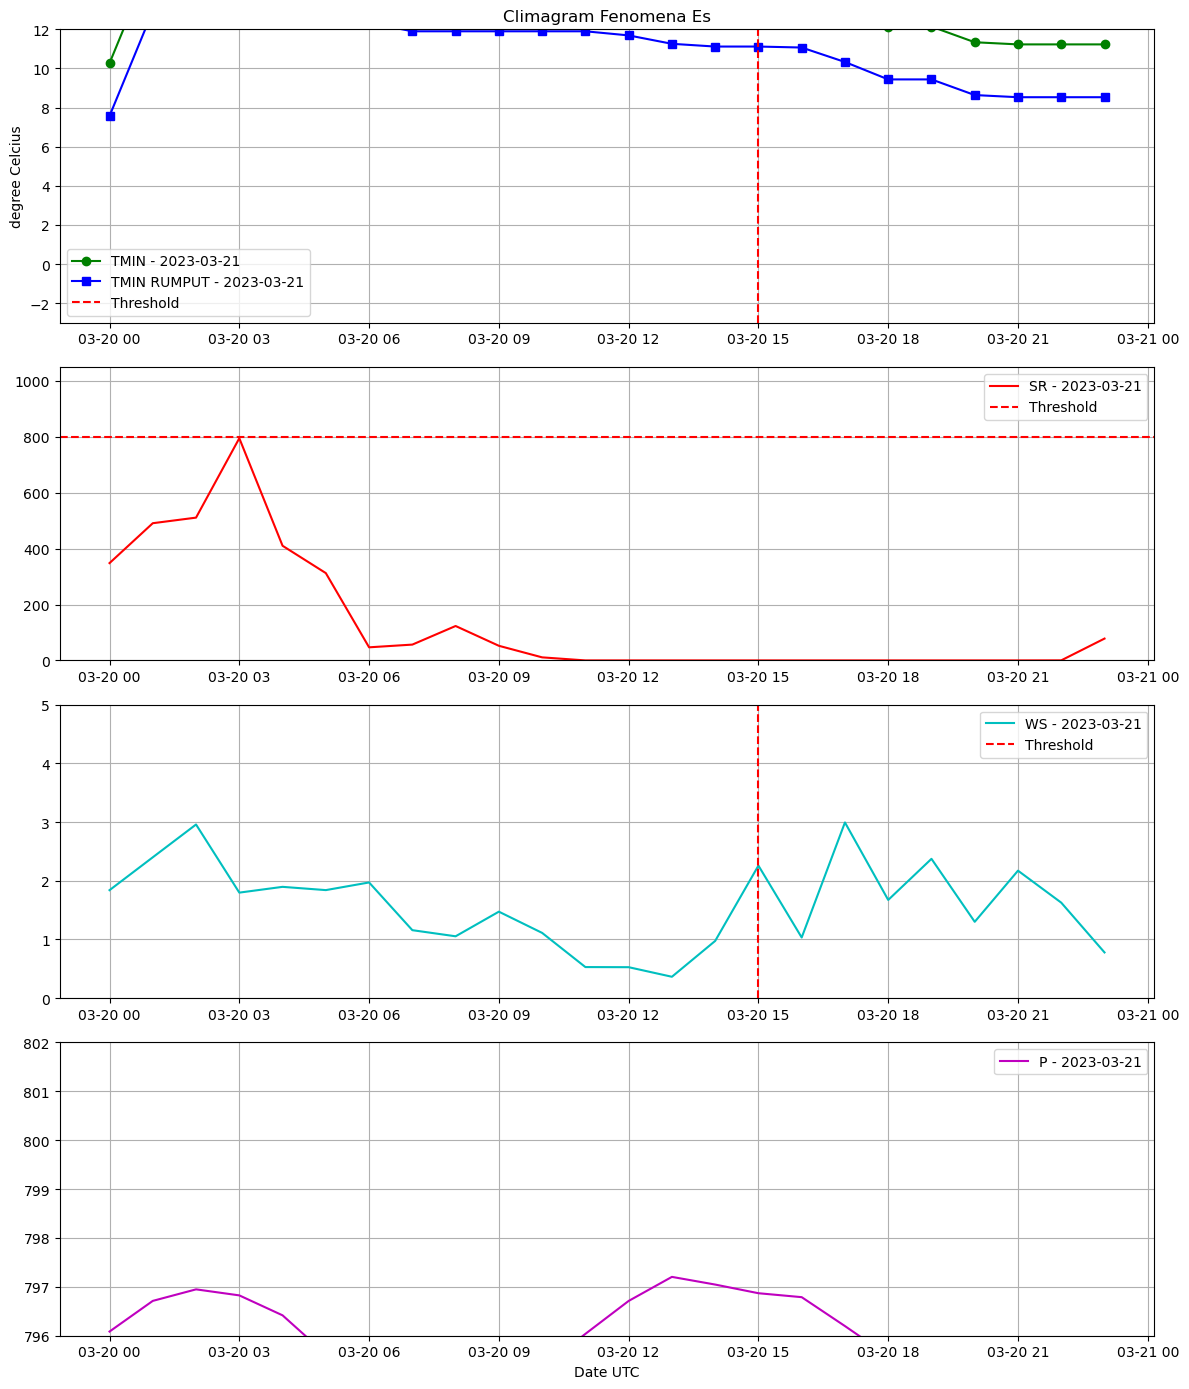

In [15]:

from datetime import datetime, timedelta
import matplotlib.pyplot as plt

data1 = df[['TT AIR MIN', 'Hour']].resample('H').min()
data2 = df[['TT AIR MIN GRASS']].resample('H').min()
data3 = df[['SR AVG', 'Hour']].resample('H').mean()
#data4 = df_extrapolate[['WD AVG']].resample('D').min()
data5 = df[['WS AVG', 'Hour']].resample('H').mean()
data6 = df[['PP AIR', 'Hour']].resample('H').mean()


# Specify the start and end dates of the selected time range
start_date = '2023-03-20'
end_date = start_date



# Convert the start_date string to a datetime object
start_date_1 = datetime.strptime(start_date, '%Y-%m-%d')
# Add 1 day to the start date
tomorrow = start_date_1 + timedelta(days=1)

# Filter data1 for the selected time range
selected_data1 = data1.loc[start_date:end_date]
selected_data2 = data2.loc[start_date:end_date]
selected_data3 = data3.loc[start_date:end_date]
#selected_data4 = data4.loc[start_date:end_date]
selected_data5 = data5.loc[start_date:end_date]
selected_data6 = data6.loc[start_date:end_date]

# Create a figure
plt.figure(figsize=(12, 14))
# Plot the DataFrame, including the index
#plt.plot(df1_tmin_1.index, df1_tmin_1['TT AIR MIN'], label='TMIN')
plt.subplot(4, 1, 1)
plt.plot(selected_data1.index, selected_data1['TT AIR MIN'], marker = 'o', label=f'TMIN - {tomorrow.strftime("%Y-%m-%d")}', color='g')
plt.plot(selected_data1.index, selected_data2['TT AIR MIN GRASS'], marker='s',  label=f'TMIN RUMPUT - {tomorrow.strftime("%Y-%m-%d")}', color='b')
# plt.ylim(-2, 10)
plt.ylim(-3, 12)
# Plotting the threshold line
plt.axvline(x=selected_data1.index[15], color='r', linestyle='--', label='Threshold')



# Customize the plot
plt.title('Climagram Fenomena Es')
# plt.xlabel('Date UTC')
plt.ylabel('degree Celcius')
plt.grid(True)
plt.legend()

threshold_value = 800
plt.subplot(4, 1, 2)
plt.plot(selected_data1.index, selected_data3['SR AVG'], label=f'SR - {tomorrow.strftime("%Y-%m-%d")}', color='r')
plt.ylim(0, 1050)
# Plotting the threshold line
plt.axhline(y=threshold_value, color='r', linestyle='--', label='Threshold')

# plt.ylim(0, 930)
# Customize the plot
#plt.title('Min Temperature Over Time Daily')
# plt.xlabel('Date UTC')
#plt.ylabel('degree Celcius')
plt.grid(True)
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(selected_data1.index, selected_data5['WS AVG'], label=f'WS - {tomorrow.strftime("%Y-%m-%d")}', color='c')
plt.ylim(0, 5)
# Plotting the threshold line
plt.axvline(x=selected_data1.index[15], color='r', linestyle='--', label='Threshold')
# plt.ylim(0, 5)
# Customize the plot
#plt.title('Min Temperature Over Time Daily')
# plt.xlabel('Date UTC')
#plt.ylabel('degree Celcius')
plt.grid(True)
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(selected_data1.index, selected_data6['PP AIR'], label=f'P - {tomorrow.strftime("%Y-%m-%d")}', color='m')
plt.ylim(796, 802)
# plt.ylim(796, 800)
# Customize the plot
#plt.title('Min Temperature Over Time Daily')
plt.xlabel('Date UTC')
#plt.ylabel('degree Celcius')
plt.grid(True)
plt.legend()


# Show the plot
#plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensure all elements fit within the figure area
plt.show()

In [8]:
selected_data1.index[15]

Timestamp('2023-03-13 15:00:00+0000', tz='UTC')

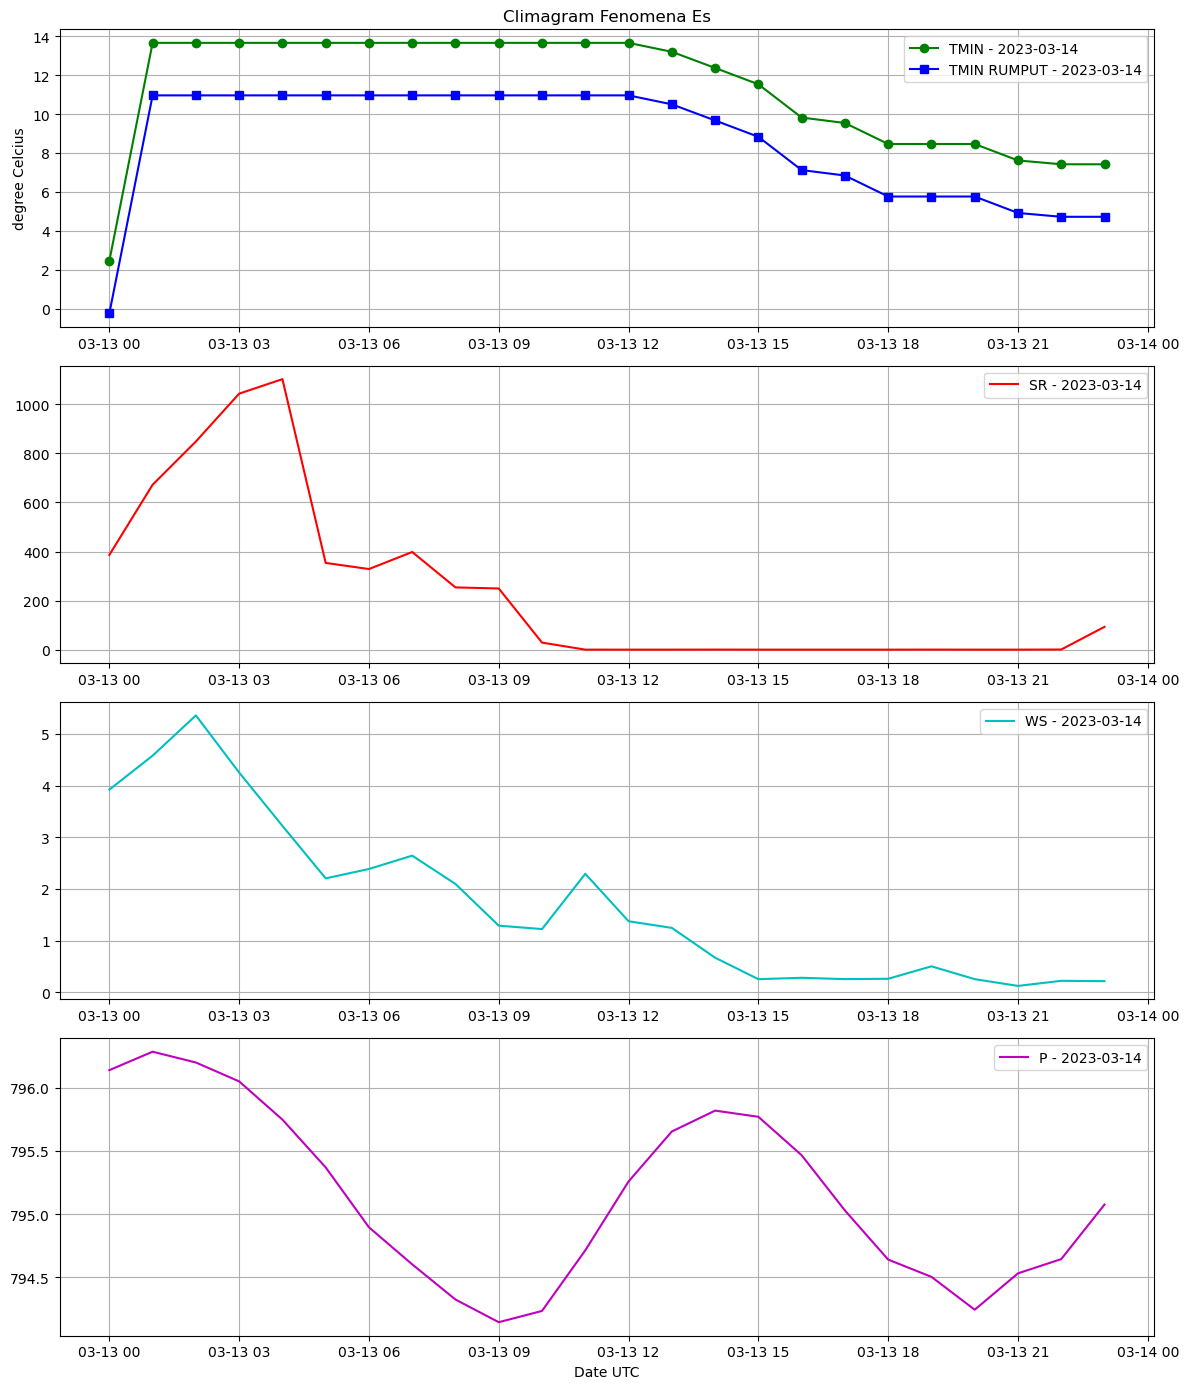

In [9]:

from datetime import datetime, timedelta
import matplotlib.pyplot as plt

data1 = df[['TT AIR MIN', 'Hour']].resample('H').min()
data2 = df[['TT AIR MIN GRASS']].resample('H').min()
data3 = df[['SR AVG', 'Hour']].resample('H').mean()
#data4 = df_extrapolate[['WD AVG']].resample('D').min()
data5 = df[['WS AVG', 'Hour']].resample('H').mean()
data6 = df[['PP AIR', 'Hour']].resample('H').mean()


# Specify the start and end dates of the selected time range
start_date = '2023-03-13'
end_date = start_date



# Convert the start_date string to a datetime object
start_date_1 = datetime.strptime(start_date, '%Y-%m-%d')
# Add 1 day to the start date
tomorrow = start_date_1 + timedelta(days=1)

# Filter data1 for the selected time range
selected_data1 = data1.loc[start_date:end_date]
selected_data2 = data2.loc[start_date:end_date]
selected_data3 = data3.loc[start_date:end_date]
#selected_data4 = data4.loc[start_date:end_date]
selected_data5 = data5.loc[start_date:end_date]
selected_data6 = data6.loc[start_date:end_date]

# Create a figure
plt.figure(figsize=(12, 14))
# Plot the DataFrame, including the index
#plt.plot(df1_tmin_1.index, df1_tmin_1['TT AIR MIN'], label='TMIN')
plt.subplot(4, 1, 1)
plt.plot(selected_data1.index, selected_data1['TT AIR MIN'], marker = 'o', label=f'TMIN - {tomorrow.strftime("%Y-%m-%d")}', color='g')
plt.plot(selected_data1.index, selected_data2['TT AIR MIN GRASS'], marker='s',  label=f'TMIN RUMPUT - {tomorrow.strftime("%Y-%m-%d")}', color='b')
# plt.ylim(-2, 10)


# Customize the plot
plt.title('Climagram Fenomena Es')
# plt.xlabel('Date UTC')
plt.ylabel('degree Celcius')
plt.grid(True)
plt.legend()


plt.subplot(4, 1, 2)
plt.plot(selected_data1.index, selected_data3['SR AVG'], label=f'SR - {tomorrow.strftime("%Y-%m-%d")}', color='r')
# plt.ylim(0, 930)
# Customize the plot
#plt.title('Min Temperature Over Time Daily')
# plt.xlabel('Date UTC')
#plt.ylabel('degree Celcius')
plt.grid(True)
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(selected_data1.index, selected_data5['WS AVG'], label=f'WS - {tomorrow.strftime("%Y-%m-%d")}', color='c')
# plt.ylim(0, 5)
# Customize the plot
#plt.title('Min Temperature Over Time Daily')
# plt.xlabel('Date UTC')
#plt.ylabel('degree Celcius')
plt.grid(True)
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(selected_data1.index, selected_data6['PP AIR'], label=f'P - {tomorrow.strftime("%Y-%m-%d")}', color='m')
# plt.ylim(796, 800)
# Customize the plot
#plt.title('Min Temperature Over Time Daily')
plt.xlabel('Date UTC')
#plt.ylabel('degree Celcius')
plt.grid(True)
plt.legend()


# Show the plot
#plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensure all elements fit within the figure area
plt.show()

In [45]:
from datetime import timedelta

# Specify the time difference between UTC and your local time
df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'])

df['Hour'] = df['TIMESTAMP'].dt.hour
df['Month'] = df['TIMESTAMP'].dt.month


df.set_index('TIMESTAMP', inplace=True)
data = df[['TT AIR MIN', 'Hour']].resample('H').min()
data

TT AIR MIN  Hour
TIMESTAMP                                  
2022-08-05 09:00:00+00:00      15.180   9.0
2022-08-05 10:00:00+00:00      12.620  10.0
2022-08-05 11:00:00+00:00      10.570  11.0
2022-08-05 12:00:00+00:00       9.110  12.0
2022-08-05 13:00:00+00:00       7.183  13.0
...                               ...   ...
2023-09-05 00:00:00+00:00       3.096   0.0
2023-09-05 01:00:00+00:00      14.160   1.0
2023-09-05 02:00:00+00:00      14.160   2.0
2023-09-05 03:00:00+00:00      14.160   3.0
2023-09-05 04:00:00+00:00      14.160   4.0

[9500 rows x 2 columns]

In [63]:
# Find consecutive periods where temperature is below zero
below_zero_periods = (data['TT AIR MIN'] <=4).astype(int).groupby((data['TT AIR MIN'] >= 4).astype(int).cumsum()).cumsum()

# Count events where temperature is below zero for at least 10 consecutive minutes within a two-hour period
events_count = (below_zero_periods==2).sum()

print(f'Number of events with temperature below zero for at least 10 minutes in a two-hour period: {events_count}')

Number of events with temperature below zero for at least 10 minutes in a two-hour period: 36


In [55]:
df_zero_period = pd.DataFrame(below_zero_periods)
df_zero_period

TT AIR MIN
TIMESTAMP                            
2022-08-05 09:00:00+00:00           0
2022-08-05 10:00:00+00:00           0
2022-08-05 11:00:00+00:00           0
2022-08-05 12:00:00+00:00           0
2022-08-05 13:00:00+00:00           0
...                               ...
2023-09-05 00:00:00+00:00           6
2023-09-05 01:00:00+00:00           0
2023-09-05 02:00:00+00:00           0
2023-09-05 03:00:00+00:00           0
2023-09-05 04:00:00+00:00           0

[9500 rows x 1 columns]

In [65]:
# Find time indices where the values are equal to 2
time_indices = df_zero_period.index[df_zero_period['TT AIR MIN'] == 2]

print(f'Time indices when values are equal to 2:\n{time_indices}')

Time indices when values are equal to 2:
DatetimeIndex(['2022-09-03 21:00:00+00:00', '2022-09-04 23:00:00+00:00',
               '2023-03-12 21:00:00+00:00', '2023-06-24 22:00:00+00:00',
               '2023-07-17 01:00:00+00:00', '2023-07-26 19:00:00+00:00',
               '2023-07-27 17:00:00+00:00', '2023-07-28 16:00:00+00:00',
               '2023-07-29 18:00:00+00:00', '2023-07-30 19:00:00+00:00',
               '2023-08-06 22:00:00+00:00', '2023-08-07 21:00:00+00:00',
               '2023-08-08 21:00:00+00:00', '2023-08-09 14:00:00+00:00',
               '2023-08-10 14:00:00+00:00', '2023-08-11 15:00:00+00:00',
               '2023-08-12 19:00:00+00:00', '2023-08-13 17:00:00+00:00',
               '2023-08-14 17:00:00+00:00', '2023-08-15 16:00:00+00:00',
               '2023-08-16 20:00:00+00:00', '2023-08-17 16:00:00+00:00',
               '2023-08-18 19:00:00+00:00', '2023-08-19 19:00:00+00:00',
               '2023-08-20 15:00:00+00:00', '2023-08-21 21:00:00+00:00',
          

In [66]:
df

TT AIR MIN  TT AIR MIN GRASS   SR AVG  WD AVG  \
TIMESTAMP                                                                  
2022-08-05 09:50:00+00:00       15.18             12.48    84.70   208.6   
2022-08-05 10:00:00+00:00       15.09             12.39    74.56   175.2   
2022-08-05 10:10:00+00:00       14.69             11.99    44.77   192.2   
2022-08-05 10:20:00+00:00       14.23             11.53    22.31   137.3   
2022-08-05 10:30:00+00:00       13.68             10.98    10.80   148.3   
...                               ...               ...      ...     ...   
2023-09-05 03:20:00+00:00       14.16             11.46  1005.00   300.6   
2023-09-05 03:30:00+00:00       14.16             11.46   703.30   207.1   
2023-09-05 03:40:00+00:00       14.16             11.46   588.70   155.8   
2023-09-05 03:50:00+00:00       14.16             11.46   875.00   313.5   
2023-09-05 04:00:00+00:00       14.16             11.46  1087.00   219.1   

                           WS AVG    PP AIR                 TANGGAL  Hour  \
TIMESTAMP                                                                   
2022-08-05 09:50:00+00:00   0.345  796.2658  2022-08-05 09:50:00+00     9   
2022-08-05 10:00:00+00:00   1.662  796.3821  2022-08-05 10:00:00+00    10   
2022-08-05 10:10:00+00:00   1.476  796.3670  2022-08-05 10:10:00+00    10   
2022-08-05 10:20:00+00:00   0.780  796.3774  2022-08-05 10:20:00+00    10   
2022-08-05 10:30:00+00:00   0.758  796.4604  2022-08-05 10:30:00+00    10   
...                           ...       ...                     ...   ...   
2023-09-05 03:20:00+00:00   3.793  797.3772  2023-09-05 03:20:00+00     3   
2023-09-05 03:30:00+00:00   3.289  797.3764  2023-09-05 03:30:00+00     3   
2023-09-05 03:40:00+00:00   3.021  797.3763  2023-09-05 03:40:00+00     3   
2023-09-05 03:50:00+00:00   3.133  797.3602  2023-09-05 03:50:00+00     3   
2023-09-05 04:00:00+00:00   3.600  797.3338  2023-09-05 04:00:00+00     4   

                           Month  
TIMESTAMP                         
2022-08-05 09:50:00+00:00      8  
2022-08-05 10:00:00+00:00      8  
2022-08-05 10:10:00+00:00      8  
2022-08-05 10:20:00+00:00      8  
2022-08-05 10:30:00+00:00      8  
...                          ...  
2023-09-05 03:20:00+00:00      9  
2023-09-05 03:30:00+00:00      9  
2023-09-05 03:40:00+00:00      9  
2023-09-05 03:50:00+00:00      9  
2023-09-05 04:00:00+00:00      9  

[54537 rows x 9 columns]

In [67]:
tmin = df['TT AIR MIN'].min()
tmin

-1.424

In [68]:
# Find the minimum value and its index in a specific column (e.g., 'Column1')
min_value_column1 = df['TT AIR MIN'].min()
min_value_index_column1 = df['TT AIR MIN'].idxmin()

print(f'Minimum value in Column1: {min_value_column1}')
print(f'Index of the minimum value in Column1: {min_value_index_column1}')


Minimum value in Column1: -1.424
Index of the minimum value in Column1: 2023-09-02 21:10:00+00:00
